In [2]:
from pathlib import Path

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


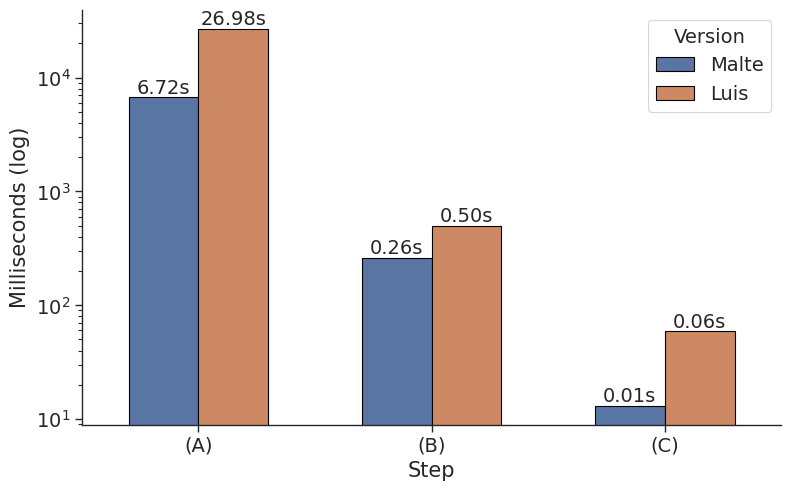

In [10]:
times = {
    "Step": ["(A)", "(B)", "(C)", "(A)", "(B)", "(C)"],
    "Milliseconds": [6721, 262 , 13, 26977, 498, 59],
    "Version": ["Malte", "Malte", "Malte", "Luis", "Luis", "Luis"],
}

# Convert the dictionary into a DataFrame for Seaborn
df = pd.DataFrame(times)

# Plot the barplot
plt.figure(figsize=(8, 5))

sns.set()
sns.set_palette("colorblind")
sns.set("paper")
sns.set_style("ticks")
ax = sns.barplot(
    x="Step", y="Milliseconds", data=df, hue="Version", edgecolor="black", **{"width": 0.6}
)
ax.set_title("")
ax.set_xlabel("Step", fontsize=15)
ax.set_ylabel("Milliseconds (log)", fontsize=15)
plt.yscale("log")
ax.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()
sns.despine()
ax.legend(title="Version", fontsize=14, title_fontsize=14)  # Adjust fontsize as needed


# Annotate bars with time in seconds
for p in ax.patches:
    time_ms = p.get_height()  # Get the height of each bar (in ms)
    time_s = time_ms / 1000  # Convert ms to seconds
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position
        p.get_height(),  # y-position (height of bar)
        f"{time_s:.2f}s",  # Annotation text
        ha="center", va="bottom", fontsize=14  # Center alignment
    )
plt.savefig("/home/malte/projects/gobi/exonSkipping/report/plots/benchmark_time.jpg", dpi=300, bbox_inches="tight")


# Cumulative Plots

In [15]:
def create_plots(exon_data, base_data, output_dir):
    """
    Create cumulative distribution plots for skipped exons and bases.
    Save plots to the specified output directory.
    """
    # Create output directory if it doesn't exist
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Plot settings
    sns.set()
    sns.set("paper")
    sns.set_style("ticks")
    # sns.set_palette("colorblind")
    sns.set_palette("tab10")
    

    # Skipped exons plot
    plt.figure(figsize=(8, 5))
    for i, (filename, data) in enumerate(exon_data.items()):
        plt.plot(data[0], np.linspace(0, len(data[1]), len(data[1])), color=f'C{i}', linewidth=2, label=filename)
    plt.xlabel('Maximum Number of Skipped Exons (log)', fontsize=15)
    plt.ylabel('Cumulative Number of Events', fontsize=15)
    plt.title('', fontsize=10)
    plt.grid(True, alpha=1)
    plt.xscale('log')
    plt.tick_params(axis="both", which="major", labelsize=12)
    plt.legend(title="File", fontsize=14, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust fontsize as needed
    # plt.tight_layout()
    sns.despine()
    plt.savefig(output_dir / 'skipped_exons.jpg', dpi=300, bbox_inches='tight')
    plt.close()

    # Skipped bases plot
    plt.figure(figsize=(8, 5))
    for i, (filename, data) in enumerate(base_data.items()):
        plt.plot(data[0], np.linspace(0, len(data[1]), len(data[1])), color=f'C{i}', linewidth=2, label=filename)
    plt.xlabel('Maximum Number of Skipped Bases (log)', fontsize=15)
    plt.ylabel('Cumulative Number of Events', fontsize=15)
    plt.title('', fontsize=8)
    plt.grid(True, alpha=1)
    plt.xscale('log')
    plt.tick_params(axis="both", which="major", labelsize=12)
    plt.legend(title="File", fontsize=14, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust fontsize as needed
    # plt.tight_layout()
    sns.despine()
    plt.savefig(output_dir / 'skipped_bases.jpg', dpi=300, bbox_inches='tight')
    plt.close()
    
def analyze_exon_skipping(input_dir):
    """
    Analyze exon skipping events from all TSV files in the input directory.
    Returns a dictionary with analysis results grouped by filename.
    """
    exons_data = {}
    bases_data = {}
    for file in os.listdir(input_dir):
        if file.endswith(".tsv"):
            df = pd.read_csv(os.path.join(input_dir, file), sep='\t')

            # Replace any infinite values with NaN
            df = df.replace([np.inf, -np.inf], np.nan)

            # Create separate DataFrames for exons and bases
            exons_data[file] = (sorted(df['max_skipped_exon'].values),
                                np.arange(1, len(df['max_skipped_exon']) + 1) / len(df['max_skipped_exon']))
            bases_data[file] = (sorted(df['max_skipped_bases'].values),
                                np.arange(1, len(df['max_skipped_bases']) + 1) / len(df['max_skipped_bases']))

    return exons_data, bases_data, df

def main():
    # Set up paths
    input_dir = Path('/home/malte/projects/gobi/exonSkipping/results')
    output_dir = Path('/home/malte/projects/gobi/exonSkipping/report/plots/')  # Adjust as needed

    # Analyze data
    exon_data, base_data, summary_df = analyze_exon_skipping(input_dir)
    
    # Create plots

    create_plots(exon_data, base_data, output_dir)
    
if __name__ == "__main__":
    main()